# **Installation**

In [ ]:
!pip install -U sentence-transformers

# **Pretrained Cross-Encoders**

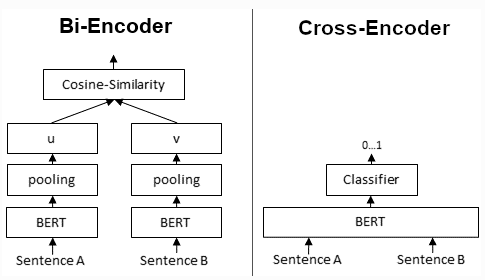

# **MS MARCO**
MS MARCO Passage Retrieval is a large dataset with real user queries from Bing search engine with annotated relevant text passages.

In [3]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-2-v2', max_length=512)
scores = model.predict([('Query1', 'Paragraph1'), ('Query1', 'Paragraph2')])

scores = model.predict([('How many people live in Berlin?', 'Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers.'),
                        ('How many people live in Berlin?', 'Berlin is well known for its museums.')])

In [4]:
scores

array([ 7.152367 , -6.2870445], dtype=float32)

# **SQuAD (ONLI)**
QNLI is based on the SQuAD dataset and was introduced by the GLUE Benchmark. Given a passage from Wikipedia, annotators created questions that are answerable by that passage.

* cross-encoder/qnli-distilroberta-base - Accuracy on QNLI dev set: 90.96

* cross-encoder/qnli-electra-base - Accuracy on QNLI dev set: 93.21


# **STSbenchmark**

They return a score 0…1 indicating the semantic similarity of the given sentence pair.

* cross-encoder/stsb-TinyBERT-L-4 - STSbenchmark test performance: 85.50

* cross-encoder/stsb-distilroberta-base - STSbenchmark test performance: 87.92

* cross-encoder/stsb-roberta-base - STSbenchmark test performance: 90.17

* cross-encoder/stsb-roberta-large - STSbenchmark test performance: 91.47


In [5]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/qnli-electra-base')
scores = model.predict([('The universe is infinite', 'I am inside of me'), ('You are not pretty', 'I like you')])

In [6]:
print(scores)

[0.00374974 0.03924192]


# **NLI**

Given two sentences, are these contradicting each other, entailing one the other or are these netural? The following models were trained on the SNLI and MultiNLI datasets.

* **cross-encoder/nli-deberta-v3-base** - Accuracy on MNLI mismatched set: 90.04

* **cross-encoder/nli-deberta-base** - Accuracy on MNLI mismatched set: 88.08

* **cross-encoder/nli-deberta-v3-xsmall** - Accuracy on MNLI mismatched set: 87.77

* **cross-encoder/nli-deberta-v3-small** - Accuracy on MNLI mismatched set: 87.55

* **cross-encoder/nli-roberta-base** - Accuracy on MNLI mismatched set: 87.47

* **cross-encoder/nli-MiniLM2-L6-H768** - Accuracy on MNLI mismatched set: 86.89

* **cross-encoder/nli-distilroberta-base** - Accuracy on MNLI mismatched set: 83.98



In [7]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/nli-deberta-v3-base')
scores = model.predict([('A man is eating pizza', 'A man eats something'), ('A black race car starts up in front of a crowd of people.', 'A man is driving down a lonely road.')])

#Convert scores to labels
label_mapping = ['contradiction', 'entailment', 'neutral']
labels = [label_mapping[score_max] for score_max in scores.argmax(axis=1)]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
print(labels)

['entailment', 'contradiction']
